In [1]:
from google.colab import auth
import gspread
from google.auth import default

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den

from tensorflow.keras.metrics import RootMeanSquaredError as rmse

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open('Saigs1').sheet1
rows = sheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})

In [4]:
x = df[["INPUT"]] .values
y = df[["OUTPUT"]].values

In [5]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [ ]:
ai_brain = Seq([
    Den(9,activation = 'relu',input_shape=[1]),
    Den(16,activation = 'relu'),
    Den(1),
])

ai_brain.compile(optimizer = 'rmsprop',loss = 'mse')

ai_brain.fit(x_train,y_train,epochs=1000)
ai_brain.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 883ms/step - loss: 14450.9004
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 14447.1416
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 14444.3340
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 14441.9121
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 14439.7480
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 14437.7520
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 14435.8730
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 14434.0762
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 14432.3408
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 14430.6562
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 14428.9922
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 1

<Axes: >

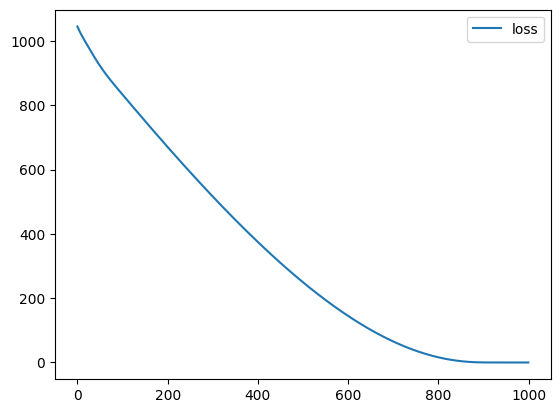

In [7]:
loss_plot = pd.DataFrame(ai_brain.history.history)
loss_plot.plot()

In [8]:
err = rmse()
preds = ai_brain.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 226ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.156957>

In [9]:
x_n1 = [[9]]
x_n_n = scaler.transform(x_n1)
ai_brain.predict(x_n_n)

1/1 [==============================] - 0s 111ms/step


array([[91.133965]], dtype=float32)